# Multi word phrases #

Hypothese:
Wenn Wörter mit einem Bindestrich verbunden werden kann es dazu führen, dass die Bedeutung falsch interpretiert wird.

Grund: Challenges for Toxic Comment Classification:
An In-Depth Error Analysis

In [9]:
%run ../config.ipynb
%run ../lib/data_loader.ipynb
%run ../lib/helper_functions.ipynb
%run ../lib/diagram_generator.ipynb
%run ../lib/metrics_generator.ipynb
%run ../lib/table_generator.ipynb

data = load_data('../data/predictions.json')
import csv
import re

In [10]:
def all(c):
    return True
def find_regex_filter(regexp):
    def f(element):
        return regexp.search(element['text'])
    return f


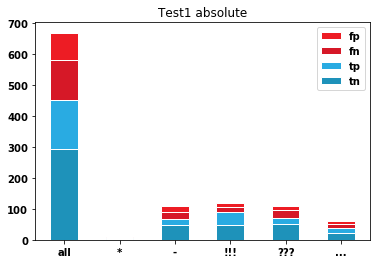

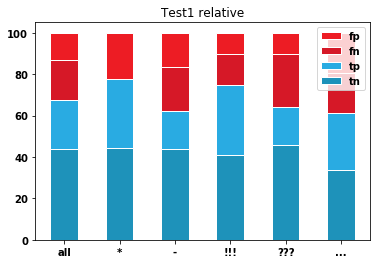

In [11]:
diagram_filters = []
diagram_filters.append(('all', all))
diagram_filters.append(('*',find_regex_filter(re.compile('.[\*]'))))
diagram_filters.append(('-',find_regex_filter(re.compile('\w\-\w'))))
diagram_filters.append(('!!!',find_regex_filter(re.compile(r'.[\!]'))))
diagram_filters.append(('???',find_regex_filter(re.compile(r'.[\?]'))))
diagram_filters.append(('...',find_regex_filter(re.compile(r'.[\.][\.]'))))

#name, filters, relative
create_plt(name = "Test1 absolute", filters = diagram_filters, relative = False)
create_plt(name = "Test1 relative", filters = diagram_filters, relative = True)

In [17]:
print('all')
show_metrics(calc_metrics())
print('contains "-"')
show_metrics(calc_metrics(diagram_filters[2][1]))
print('contains "-" difference')
show_metrics(calc_metric_difference(calc_metrics(diagram_filters[2][1])))

all


,label hate (245),label nohate (425)
pred hate (245),157,88
pred nohate (425),130,295


accuracy,precision,recall,f1_score
0.6746268656716418,0.6408163265306123,0.5470383275261324,0.5902255639097745


contains "-"


,label hate (38),label nohate (71)
pred hate (38),20,18
pred nohate (71),23,48


accuracy,precision,recall,f1_score
0.6238532110091743,0.5263157894736842,0.46511627906976744,0.49382716049382713


contains "-" difference


,label hate (245),label nohate (425)
pred hate (250),180,70
pred nohate (420),107,313


accuracy,precision,recall,f1_score
0.735820895522388,0.72,0.627177700348432,0.6703910614525139
